# word2vecの分類　（kmeans Scikit-learn）

Scikit-learnを使用してクラスター分類を行う。
Kmeansのクラスター数を調べてみる。


In [2]:
# 使用ライブラリのインストール

!pip install -U scikit-learn

!pip install --upgrade gensim

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [8]:
from gensim.models import KeyedVectors
from sklearn.cluster import KMeans
import numpy as np

def keams_cluster_words(model_path, num_clusters):
    # Word2Vecモデルの読み込み
    model = KeyedVectors.load_word2vec_format(model_path, binary=False)

    # 全単語のベクトルを取得
    word_vectors = model.vectors

    # K-meansクラスタリングの実行
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(word_vectors)

    # 各単語が属するクラスタを取得
    cluster_indices = kmeans.labels_

    # 単語とクラスタの対応を取得
    word_cluster_map = {word: cluster_indices[i] for i, word in enumerate(model.index_to_key)}

    # 結果を表示 (例: 最初の10単語)
    for word, cluster in list(word_cluster_map.items())[:10]:
        print(f"Word: {word}, Cluster: {cluster}")

    return word_vectors, kmeans, cluster_indices


In [3]:
# 使用ライブラリのインストール

!pip install matplotlib
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [9]:
import logging
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.utils import resample

# ログ設定
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def plot_cluster_word_counts(cluster_indices):
    logging.info("Calculating the number of words per cluster...")
    unique, counts = np.unique(cluster_indices, return_counts=True)
    cluster_counts = dict(zip(unique, counts))

    logging.info("Plotting the number of words per cluster...")
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(cluster_counts.keys()), y=list(cluster_counts.values()), palette="viridis")
    plt.title('Number of Words per Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Words')
    plt.show()

def plot_cluster_centers_pca(word_vectors, kmeans):
    logging.info("Performing PCA on word vectors...")
    pca = PCA(n_components=2)
    word_vectors_pca = pca.fit_transform(word_vectors)
    cluster_centers_pca = pca.transform(kmeans.cluster_centers_)

    logging.info("Plotting word vectors and cluster centers...")
    plt.figure(figsize=(10, 8))
    plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1], c=cluster_indices, cmap='viridis', alpha=0.5, s=10)
    plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
    plt.title('Word Vectors and Cluster Centers (PCA)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()

def plot_silhouette_analysis(word_vectors, cluster_indices, num_clusters):
    logging.info("Calculating silhouette score...")
    sampled_word_vectors, sampled_cluster_indices = resample(word_vectors, cluster_indices, n_samples=int(0.01*len(word_vectors)), random_state=42)
    silhouette_avg = silhouette_score(sampled_word_vectors, sampled_cluster_indices)
    logging.info(f"Silhouette Score: {silhouette_avg:.3f}")

    logging.info("Plotting silhouette scores for each cluster...")
    sample_silhouette_values = silhouette_samples(sampled_word_vectors, sampled_cluster_indices)
    y_lower = 10

    plt.figure(figsize=(10, 8))

    # クラスターごとのサンプル数が大きい場合に進行状況を表示
    for i in tqdm(range(num_clusters), desc="Clusters processed"):
        ith_cluster_silhouette_values = sample_silhouette_values[sampled_cluster_indices == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / num_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.title("Silhouette Plot for Various Clusters")
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster")

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.show()


2024-08-26 00:10:05,574 - INFO - loading projection weights from ../data/japanese_word2vec_vectors.vec
2024-08-26 00:11:37,893 - INFO - KeyedVectors lifecycle event {'msg': 'loaded (1015474, 200) matrix of type float32 from ../data/japanese_word2vec_vectors.vec', 'binary': False, 'encoding': 'utf8', 'datetime': '2024-08-26T00:11:37.892950', 'gensim': '4.3.3', 'python': '3.9.6 (default, Mar 29 2024, 10:51:09) \n[Clang 15.0.0 (clang-1500.3.9.4)]', 'platform': 'macOS-14.6.1-arm64-arm-64bit', 'event': 'load_word2vec_format'}
2024-08-26 00:12:14,703 - INFO - Calculating the number of words per cluster...
2024-08-26 00:12:14,720 - INFO - Plotting the number of words per cluster...
2024-08-26 00:12:14,734 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/var/folders/2x/p5h03dq11m7b230v42t51spw0000gn/T/ipykernel_2194/3771410349.py:20: FutureWarni

Word: の, Cluster: 4
Word: 、, Cluster: 4
Word: 。, Cluster: 4
Word: に, Cluster: 4
Word: は, Cluster: 4
Word: を, Cluster: 4
Word: た, Cluster: 9
Word: が, Cluster: 4
Word: で, Cluster: 4
Word: て, Cluster: 4


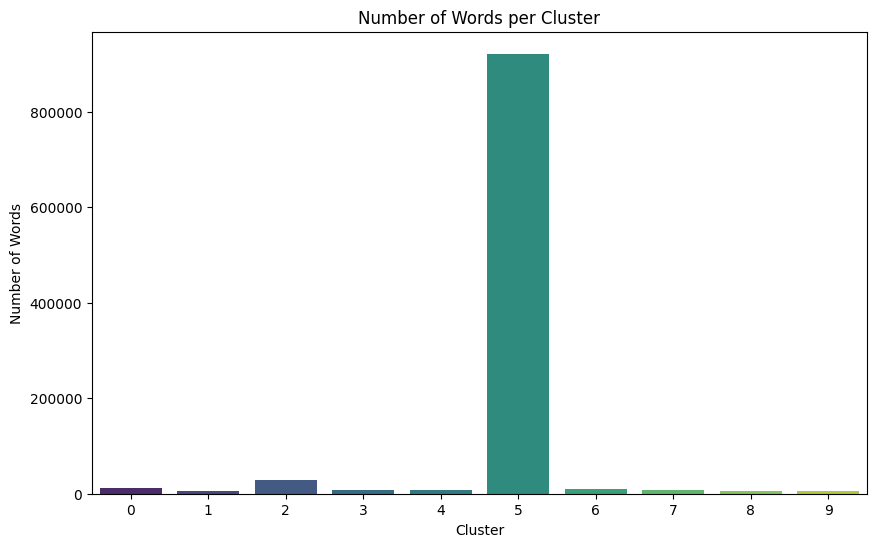

2024-08-26 00:12:14,880 - INFO - Performing PCA on word vectors...
2024-08-26 00:12:16,445 - INFO - Plotting word vectors and cluster centers...


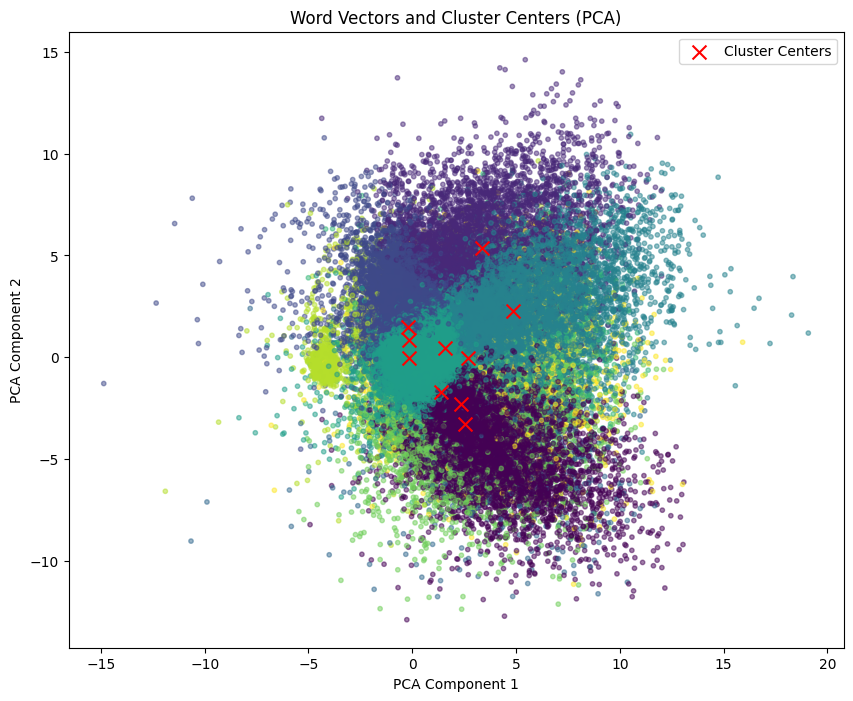

2024-08-26 00:12:27,337 - INFO - Calculating silhouette score...
2024-08-26 00:12:29,131 - INFO - Silhouette Score: 0.618
2024-08-26 00:12:29,132 - INFO - Plotting silhouette scores for each cluster...
Clusters processed: 100%|██████████| 10/10 [00:00<00:00, 594.38it/s]


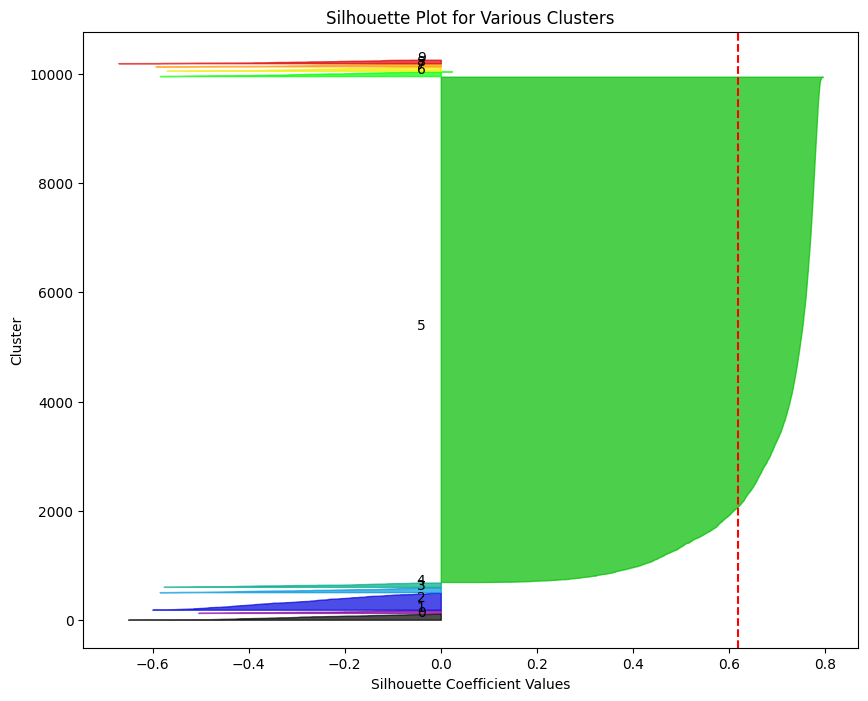

In [23]:
model_path = '../data/japanese_word2vec_vectors.vec'
num_clusters = 10
word_vectors, kmeans, cluster_indices = keams_cluster_words(model_path, num_clusters)

plot_cluster_word_counts(cluster_indices)
plot_cluster_centers_pca(word_vectors, kmeans)
plot_silhouette_analysis(word_vectors, cluster_indices, num_clusters)